In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

mainpath = '../datasets/'

df_dogumhizi = pd.read_csv(mainpath + 'dogumhizi.csv', encoding='utf-8')

df_2022evlilikyas = pd.read_csv(mainpath + '2022evlilikyas.csv', encoding='utf-8')

df_gdpProvince = pd.read_csv(mainpath + 'gdp_province.csv', encoding='utf-8')

df_ihracat = pd.read_csv(mainpath + 'ihracat_dolar_2022.csv', encoding='utf-8')

df_starbucks = pd.read_csv(mainpath + 'starbucks.csv', encoding='utf-8')

highschool_education_rate_according_meb = pd.read_csv(mainpath + 'highschool_education_rate_according_meb.csv', encoding='utf-8')

df_election_results = pd.read_csv(mainpath + 'election_results.csv', encoding='utf-8')

df_dogumhizi['city'] = df_dogumhizi['city'].str.strip()
df_2022evlilikyas['city'] = df_2022evlilikyas['city'].str.strip()
df_gdpProvince['city'] = df_gdpProvince['city'].str.strip()
df_ihracat['city'] = df_ihracat['city'].str.strip()
df_starbucks['city'] = df_starbucks['city'].str.strip()
highschool_education_rate_according_meb['city'] = highschool_education_rate_according_meb['city'].str.strip()
df_election_results['city'] = df_election_results['city'].str.strip()

# Merge the DataFrames based on the 'city' column
# Merge DataFrames on 'city' column
df_merged = pd.merge(df_dogumhizi, df_2022evlilikyas, on='city',how = 'left')
df_merged = pd.merge(df_merged, df_gdpProvince, on='city' , how = 'left')
df_merged = pd.merge(df_merged, df_ihracat, on='city', how = 'left')
df_merged = pd.merge(df_merged, df_starbucks, on='city', how = 'left')
df_merged = pd.merge(df_merged, highschool_education_rate_according_meb, on='city', how = 'left')
df_merged = pd.merge(df_merged, df_election_results, on='city', how = 'left')
df_merged['starbucks count'] = df_merged['starbucks count'].fillna(0)

/var/folders/w6/jhfm5bt97m51k51jnqptzlk80000gn/T/ipykernel_3329/1916622023.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = coefficient_test_df.corr()


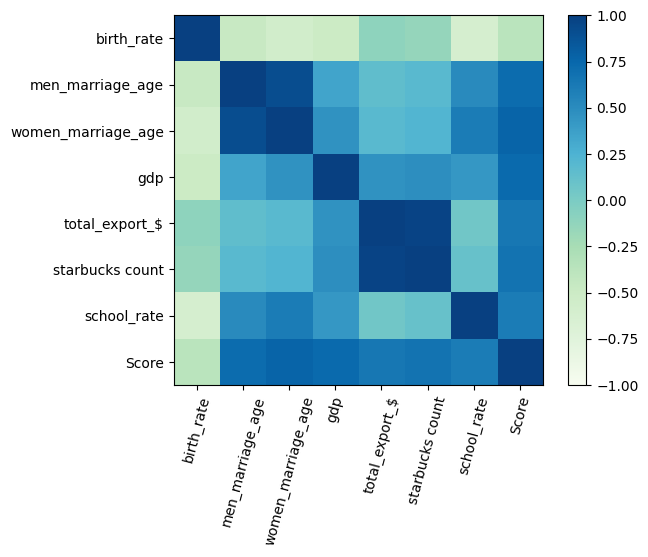

,birth_rate,men_marriage_age,women_marriage_age,gdp,total_export_$,starbucks count,school_rate,Score
birth_rate,1.000000,-0.473261,-0.568548,-0.507136,-0.105273,-0.148201,-0.616771,-0.377283
men_marriage_age,-0.473261,1.000000,0.911599,0.338588,0.145984,0.184355,0.509322,0.716772
women_marriage_age,-0.568548,0.911599,1.000000,0.453397,0.180999,0.225981,0.606558,0.772272
gdp,-0.507136,0.338588,0.453397,1.000000,0.460030,0.476855,0.424800,0.727391
total_export_$,-0.105273,0.145984,0.180999,0.460030,1.000000,0.973199,0.049022,0.636592
starbucks count,-0.148201,0.184355,0.225981,0.476855,0.973199,1.000000,0.107573,0.669935
school_rate,-0.616771,0.509322,0.606558,0.424800,0.049022,0.107573,1.000000,0.601950
Score,-0.377283,0.716772,0.772272,0.727391,0.636592,0.669935,0.601950,1.000000


In [55]:
cols_to_normalize = ['birth_rate', 'men_marriage_age', 'women_marriage_age', 'gdp', 'total_export_$', 'starbucks count', 'school_rate']
coefficients = [1, 1, 1, 1, 1, 1, 1]

coefficient_test_df = df_merged.copy()
# Normalize the features and convert from strings to floats where necessary
scaler = MinMaxScaler()
for col in cols_to_normalize:
    if coefficient_test_df[col].dtype == 'object':  # If the column is of object type (possibly string)
        coefficient_test_df[col] = coefficient_test_df[col].str.replace(' ', '').astype(float)  # Remove spaces and convert to float
    coefficient_test_df[[col]] = scaler.fit_transform(coefficient_test_df[[col]])

# Apply the coefficients
for col, coeff in zip(cols_to_normalize, coefficients):
    coefficient_test_df[col] *= coeff

# Calculate the score for each city
coefficient_test_df['Score'] = coefficient_test_df[cols_to_normalize].sum(axis=1)

corrs = coefficient_test_df.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()
corrs

/var/folders/w6/jhfm5bt97m51k51jnqptzlk80000gn/T/ipykernel_3329/2330266334.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df_merged.corr()


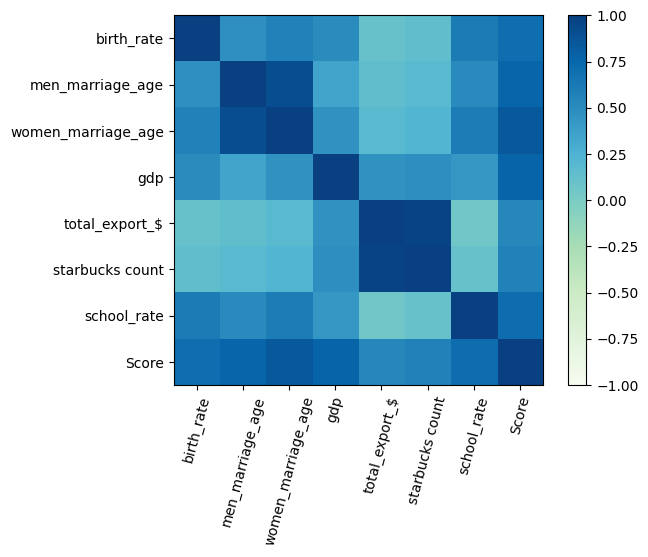

,birth_rate,men_marriage_age,women_marriage_age,gdp,total_export_$,starbucks count,school_rate,Score
birth_rate,1.000000,0.473261,0.568548,0.507136,0.105273,0.148201,0.616771,0.696828
men_marriage_age,0.473261,1.000000,0.911599,0.338588,0.145984,0.184355,0.509322,0.758817
women_marriage_age,0.568548,0.911599,1.000000,0.453397,0.180999,0.225981,0.606558,0.839359
gdp,0.507136,0.338588,0.453397,1.000000,0.460030,0.476855,0.424800,0.770837
total_export_$,0.105273,0.145984,0.180999,0.460030,1.000000,0.973199,0.049022,0.525855
starbucks count,0.148201,0.184355,0.225981,0.476855,0.973199,1.000000,0.107573,0.568803
school_rate,0.616771,0.509322,0.606558,0.424800,0.049022,0.107573,1.000000,0.703889
Score,0.696828,0.758817,0.839359,0.770837,0.525855,0.568803,0.703889,1.000000


In [56]:
cols_to_normalize = ['birth_rate', 'men_marriage_age', 'women_marriage_age', 'gdp', 'total_export_$', 'starbucks count', 'school_rate']
coefficients = [-0.377, 0.716, 0.772, 0.727, 0.636, 0.669, 0.601]

# Normalize the features and convert from strings to floats where necessary
scaler = MinMaxScaler()
for col in cols_to_normalize:
    if df_merged[col].dtype == 'object':  # If the column is of object type (possibly string)
        df_merged[col] = df_merged[col].str.replace(' ', '').astype(float)  # Remove spaces and convert to float
    df_merged[[col]] = scaler.fit_transform(df_merged[[col]])

# Apply the coefficients
for col, coeff in zip(cols_to_normalize, coefficients):
    df_merged[col] *= coeff

# Calculate the score for each city
df_merged['Score'] = df_merged[cols_to_normalize].sum(axis=1)

corrs = df_merged.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()
corrs


In [57]:
df_merged[['city','Score']].sort_values(by='Score', ascending=False)

,city,Score
33,İstanbul,3.089410
61,Tunceli,2.319638
5,Ankara,1.952267
34,İzmir,1.824580
7,Artvin,1.787313
40,Kocaeli,1.723469
25,Eskişehir,1.628529
47,Muğla,1.571313
76,Yalova,1.526591
38,Kırklareli,1.515327


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_merged['Score'].values.reshape(-1,1)
y = df_merged['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# Compute cross-validation score
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Mean cross-validation score: {cv_scores.mean()}")

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Mean cross-validation score: 0.7654411764705882
[[10  1  0]
 [ 2  1  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

    AK Parti       0.83      0.91      0.87        11
         CHP       0.50      0.33      0.40         3
   Yeşil Sol       1.00      1.00      1.00         3

    accuracy                           0.82        17
   macro avg       0.78      0.75      0.76        17
weighted avg       0.80      0.82      0.81        17



/var/folders/w6/jhfm5bt97m51k51jnqptzlk80000gn/T/ipykernel_3329/892834108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.rename(columns={"NAME_1":"city"},inplace=True)
/var/folders/w6/jhfm5bt97m51k51jnqptzlk80000gn/T/ipykernel_3329/892834108.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
/var/folders/w6/jhfm5bt97m51k51jnqptzlk80000gn/T/ipykernel_3329/892834108.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<Axes: >

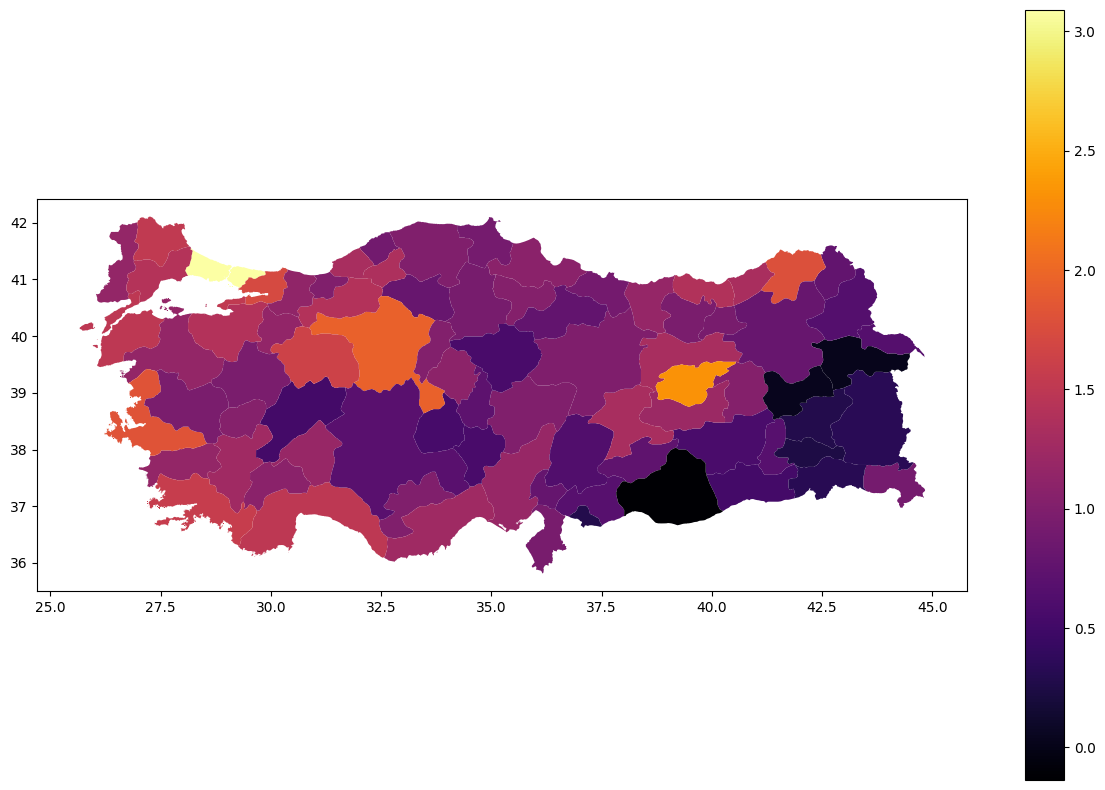

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

countries = gpd.read_file("../datasets/countries.geojson")

turkey_geo = gpd.read_file(r'../datasets/TUR_adm/TUR_adm1.shp')

turkey = turkey_geo[["NAME_1","geometry"]]
turkey.rename(columns={"NAME_1":"city"},inplace=True)

turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
turkey.replace('Çankiri', 'Çankırı',inplace=True)
turkey.replace('Adiyaman', 'Adıyaman',inplace=True)
turkey.replace('Agri', 'Ağrı',inplace=True)
turkey.replace('Aydin', 'Aydın',inplace=True)
turkey.replace('Balikesir', 'Balıkesir',inplace=True)
turkey.replace('Diyarbakir', 'Diyarbakır',inplace=True)
turkey.replace('Eskisehir', 'Eskişehir',inplace=True)
turkey.replace('Gümüshane', 'Gümüşhane',inplace=True)
turkey.replace('Istanbul', 'İstanbul',inplace=True)
turkey.replace('Izmir', 'İzmir',inplace=True)
turkey.replace('Kinkkale', 'Kırıkkale',inplace=True)
turkey.replace('Kirklareli', 'Kırklareli',inplace=True)
turkey.replace('Kirsehir', 'Kırşehir',inplace=True)
turkey.replace('Mugla', 'Muğla',inplace=True)
turkey.replace('Mus', 'Muş',inplace=True)
turkey.replace('Nevsehir', 'Nevşehir',inplace=True)
turkey.replace('Sanliurfa', 'Şanlıurfa',inplace=True)
turkey.replace('Sirnak', 'Şırnak',inplace=True)
turkey.replace('Tekirdag', 'Tekirdağ',inplace=True)
turkey.replace('Usak', 'Uşak',inplace=True)
turkey.replace('Zinguldak', 'Zonguldak',inplace=True)
turkey.replace('Afyon', 'Afyonkarahisar',inplace=True)
turkey.replace('Nigde', 'Niğde',inplace=True)


geoturkey = turkey.merge(df_merged[['city','Score']], on='city')

geoturkey.plot(column="Score",cmap="inferno", legend=True, figsize=(15,10))
